<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-#9-." data-toc-modified-id="Assignment-#9-.-1">Assignment #9 .</a></span><ul class="toc-item"><li><span><a href="#Time-series-analysis" data-toc-modified-id="Time-series-analysis-1.1">Time series analysis</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1.2">Data preparation</a></span></li><li><span><a href="#Predicting-with-FB-Prophet" data-toc-modified-id="Predicting-with-FB-Prophet-1.3">Predicting with FB Prophet</a></span><ul class="toc-item"><li><span><a href="#Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?" data-toc-modified-id="Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?-1.3.1"><font color="red">Question 1:</font> What is the prediction for 1st of January 17 00:00:00?</a></span></li><li><span><a href="#Question-2:-What-is-MAPE-equal-to?" data-toc-modified-id="Question-2:-What-is-MAPE-equal-to?-1.3.2"><font color="red">Question 2:</font> What is MAPE equal to?</a></span></li><li><span><a href="#Question-3:-What-is-MAE-equal-to?" data-toc-modified-id="Question-3:-What-is-MAE-equal-to?-1.3.3"><font color="red">Question 3:</font> What is MAE equal to?</a></span></li></ul></li><li><span><a href="#Predicting-with-ARIMA" data-toc-modified-id="Predicting-with-ARIMA-1.4">Predicting with ARIMA</a></span><ul class="toc-item"><li><span><a href="#Question-4:-What's-the-stationarity?" data-toc-modified-id="Question-4:-What's-the-stationarity?-1.4.1"><font color="red">Question 4:</font> What's the stationarity?</a></span></li><li><span><a href="#Question-5:-Best-hyperparameters-before-Box-Cox-transformation?" data-toc-modified-id="Question-5:-Best-hyperparameters-before-Box-Cox-transformation?-1.4.2"><font color="red">Question 5:</font> Best hyperparameters before Box-Cox transformation?</a></span></li><li><span><a href="#Question-6:-Best-hyperparameters-after-Box-Cox-transformation?" data-toc-modified-id="Question-6:-Best-hyperparameters-after-Box-Cox-transformation?-1.4.3"><font color="red">Question 6:</font> Best hyperparameters after Box-Cox transformation?</a></span></li><li><span><a href="#Question-7:-Draw-final-prediction-and-historical-data" data-toc-modified-id="Question-7:-Draw-final-prediction-and-historical-data-1.4.4"><font color="red">Question 7:</font> Draw final prediction and historical data</a></span></li></ul></li></ul></li></ul></div>

<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
<center>Author: [Mariya Mansurova](https://www.linkedin.com/in/mariya-mansurova-04070982/), analyst & developer in Yandex.Metrics team. <br>Translated by [Ivan Zakharov](https://www.linkedin.com/in/ivan-zakharov/), ML enthusiast.
<br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# Assignment #9 . 
## Time series analysis

<font color='red'>Fill cells marked with "Your code here" and write answer below question after text "Type your answer here:"
    </font>    

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests

from plotly import __version__
print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

4.3.0


## Data preparation

In [15]:
df = pd.read_csv('hour_online.csv')
df = df[df['Users'] != 0]
df.head()

,Time,Users
0,1/1/17 0:00,34002
1,1/1/17 1:00,37947
2,1/1/17 2:00,41517
3,1/1/17 3:00,44476
4,1/1/17 4:00,46234


In [16]:
df.shape

(2616, 2)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [17]:
df.Time = pd.to_datetime(df.Time)


In [18]:
plotly_df(df.set_index('Time')[["Users"]])

In [19]:
df.head()

,Time,Users
0,2017-01-01 00:00:00,34002
1,2017-01-01 01:00:00,37947
2,2017-01-01 02:00:00,41517
3,2017-01-01 03:00:00,44476
4,2017-01-01 04:00:00,46234


In [20]:
from fbprophet import Prophet

In [21]:
predictions = 30

df.columns = ['ds', 'y']
df.tail()

,ds,y
2620,2017-04-20 05:00:00,34833
2621,2017-04-20 06:00:00,35932
2622,2017-04-20 07:00:00,38418
2623,2017-04-20 08:00:00,40238
2624,2017-04-20 09:00:00,40763


In [22]:
train_df = df[:-predictions].copy()

In [23]:
m = Prophet()
m.fit(train_df);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [24]:
future = m.make_future_dataframe(periods=predictions, freq = 'H')
future.tail()

,ds
2611,2017-04-20 05:00:00
2612,2017-04-20 06:00:00
2613,2017-04-20 07:00:00
2614,2017-04-20 08:00:00
2615,2017-04-20 09:00:00


In [27]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2611,2017-04-20 05:00:00,35313.552909,37072.771496,48102.231526,35304.828974,35313.577050,7401.138199,7401.138199,7401.138199,8788.263876,8788.263876,8788.263876,-1387.125677,-1387.125677,-1387.125677,0.0,0.0,0.0,42714.691108
2612,2017-04-20 06:00:00,35322.168780,39815.957013,51185.062307,35305.107610,35325.013257,10094.722149,10094.722149,10094.722149,11417.666438,11417.666438,11417.666438,-1322.944289,-1322.944289,-1322.944289,0.0,0.0,0.0,45416.890929
2613,2017-04-20 07:00:00,35330.784651,41364.558495,53066.221562,35308.698191,35341.064830,11946.979577,11946.979577,11946.979577,13203.364932,13203.364932,13203.364932,-1256.385356,-1256.385356,-1256.385356,0.0,0.0,0.0,47277.764228
2614,2017-04-20 08:00:00,35339.400522,43339.176941,54304.112047,35311.948129,35359.332882,13551.414423,13551.414423,13551.414423,14739.078775,14739.078775,14739.078775,-1187.664352,-1187.664352,-1187.664352,0.0,0.0,0.0,48890.814945
2615,2017-04-20 09:00:00,35348.016393,44318.913058,55791.120581,35314.306861,35370.577652,14838.393219,14838.393219,14838.393219,15955.382618,15955.382618,15955.382618,-1116.989399,-1116.989399,-1116.989399,0.0,0.0,0.0,50186.409613


### <font color='red'>Question 1:</font> What is the prediction for 1st of January 17 00:00:00?

What is the prediction of the number of views of the wiki page on 1st of January 17? Round to the nearest integer.

- Type your answer here: 


In [31]:
# You code here
forecast[forecast["ds"] == "2017-01-01 00:00:00"]["yhat"]

0    39050.6327
Name: yhat, dtype: float64

Estimate the quality of the prediction with the last 30 points.

### <font color='red'>Question 2:</font> What is MAPE equal to?

- Type your answer here: 

### <font color='red'>Question 3:</font> What is MAE equal to?

- Type your answer here: 


In [35]:
# You code here

def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))



def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

cmp_df = make_comparison_dataframe(df, forecast)

for err_name, err_value in calculate_forecast_errors(cmp_df, predictions).items():
    print(err_name, err_value)


MAPE 12.686739309601688
MAE 4349.67499522812


## Predicting with ARIMA

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

### <font color='red'>Question 4:</font> What's the stationarity?

Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?

- Is the series stationary (yes/no)? Answer: 
- What is p_value? Answer: p = 

In [43]:
print("p_value - ", 0.25574)
print("series is non-stationary")

p_value -  0.25574
series is non-stationary


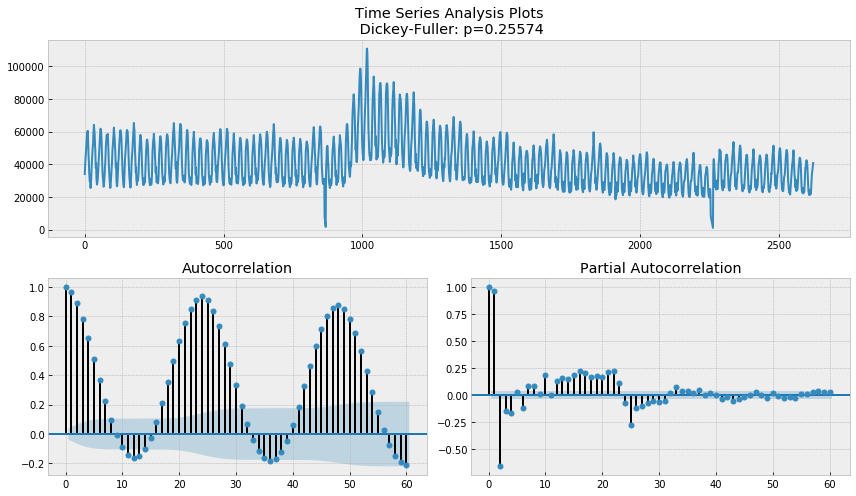

In [44]:
# You code here
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(df["y"], lags=60)        

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 5:</font> Best hyperparameters before Box-Cox transformation?

Try 1st and 2nd diff.

What parameters are the best for the model according to the `AIC` criterion?

Choose one option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2




In [46]:
# You code here
print("p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1 is the option")

p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1 is the option


**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 6:</font> Best hyperparameters after Box-Cox transformation?

No do the same as in Question 5, but with Box-Cox transformation.

What is the optimal Box-Cox transformation parameter?

- Type answer here:

What parameters are the best for the model according to the `AIC` criterion?

Choose on option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2


Now do the same, but for the series with Box-Cox transformation.

In [45]:
import scipy.stats
train_df['y_box'], lmbda = scipy.stats.boxcox(train_df['y']) 
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.246704


In [ ]:
# You code here

 
### <font color='red'>Question 7:</font> Draw final prediction and historical data

Don't forget to invere Box-Cox...

In [ ]:
# You code here